# Credit Limit

![image](image.png)


# Giriş 🌟


Müşteri kaybı, müşterilerin bir şirketle iş yapmayı bıraktığı durum olarak, bankacılık dahil çeşitli endüstrilerdeki işletmeler için kritik bir endişe kaynağıdır. Müşteri kaybına katkıda bulunan faktörleri anlamak, bankaların müşterileri elde tutma ve karlılığı sürdürme stratejileri geliştirmesine yardımcı olabilir. Müşteri kaybı analizine ek olarak, kredi kartı kullanımı desenlerinin analizi, müşteri davranışı ve tercihleri hakkında değerli içgörüler sağlar.


### Gerekli Kütüphaneleri İçeri Aktarma📦

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def pandas_ince_ayar():
    pd.set_option('display.max_columns', None)
    pd.set_option("display.max_rows", None)
    pd.set_option('display.width', 500)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: "%.1f" % x)
    warnings.simplefilter(action='ignore', category=Warning)

pandas_ince_ayar()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Veri Ön İşleme ve Doğrulama 🧹

In [19]:
# Veriyi Yükleme
df = pd.read_csv('Credit_Limit.csv')

# Veriye Genel Bakış
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(dataframe.nunique())

check_df(df)

# Herhangi eksik değer olmadığından medyan ile doldurma yapılamadı

'''
# Eksik Değerlerin İşlenmesi
df = df.fillna(df.median())  # Eksik değerleri medyan ile doldur

# Kategorik Değişkenlerin Dönüştürülmesi
categorical_columns = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
for column in categorical_columns:
    df[column] = df[column].astype("category")

check_df(df)
'''

##################### Shape #####################
(10127, 15)
##################### Types #####################
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
dtype: object
##################### Head #####################
   CLIENTNUM     Attrition_Flag  Customer_Age Gender Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
0  768805383  Existing Customer      

'\n# Eksik Değerlerin İşlenmesi\ndf = df.fillna(df.median())  # Eksik değerleri medyan ile doldur\n\n# Kategorik Değişkenlerin Dönüştürülmesi\ncategorical_columns = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]\nfor column in categorical_columns:\n    df[column] = df[column].astype("category")\n\ncheck_df(df)\n'

#### Veri setiyle ilgili bazı bilgiler:

- Toplamda 10,127 giriş var ve 15 sütun. 
- Müşterilerin yaşları, cinsiyetleri, eğitim seviyeleri, medeni durumları, gelir kategorileri ve kredi kartı kategorileri gibi özellikler bulunmakta. 

#### Ayrıca müşterilerin kredi limitleri, kredi kartı kullanımı ve diğer finansal ölçütler de veri setinde yer alıyor. 

## Eksik Değer Analizi

In [17]:
# Eksik Değer Analizi
def missing_values_table(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(ascending=False, inplace=True)
    missing_percentage = (missing_values / len(dataframe)) * 100
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    return missing_data

missing_data = missing_values_table(df)
print(missing_data)

# Eksik değerleri düşürme
data_cleaned = df.dropna()
print(data_cleaned.shape)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
(10127, 15)


## Aykırı Değer Analizi

In [20]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] > up_limit) | (dataframe[variable] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in df.select_dtypes(include=['float64', 'int64']):
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


## Veri Temizleme ve Dönüştürme

In [21]:
# Kategorik değişkenleri dönüştürme
data_cleaned["Attrition_Flag"] = data_cleaned["Attrition_Flag"].astype("category")
data_cleaned["Gender"] = data_cleaned["Gender"].astype("category")
data_cleaned["Education_Level"] = data_cleaned["Education_Level"].astype("category")
data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].astype("category")
data_cleaned["Income_Category"] = data_cleaned["Income_Category"].astype("category")
data_cleaned["Card_Category"] = data_cleaned["Card_Category"].astype("category")

data_cleaned.dtypes


CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Trans_Amt                int64
dtype: object

# Keşifçi Veri Analizi📚
### Kategorik  değişkenler arası korelasyon analizi

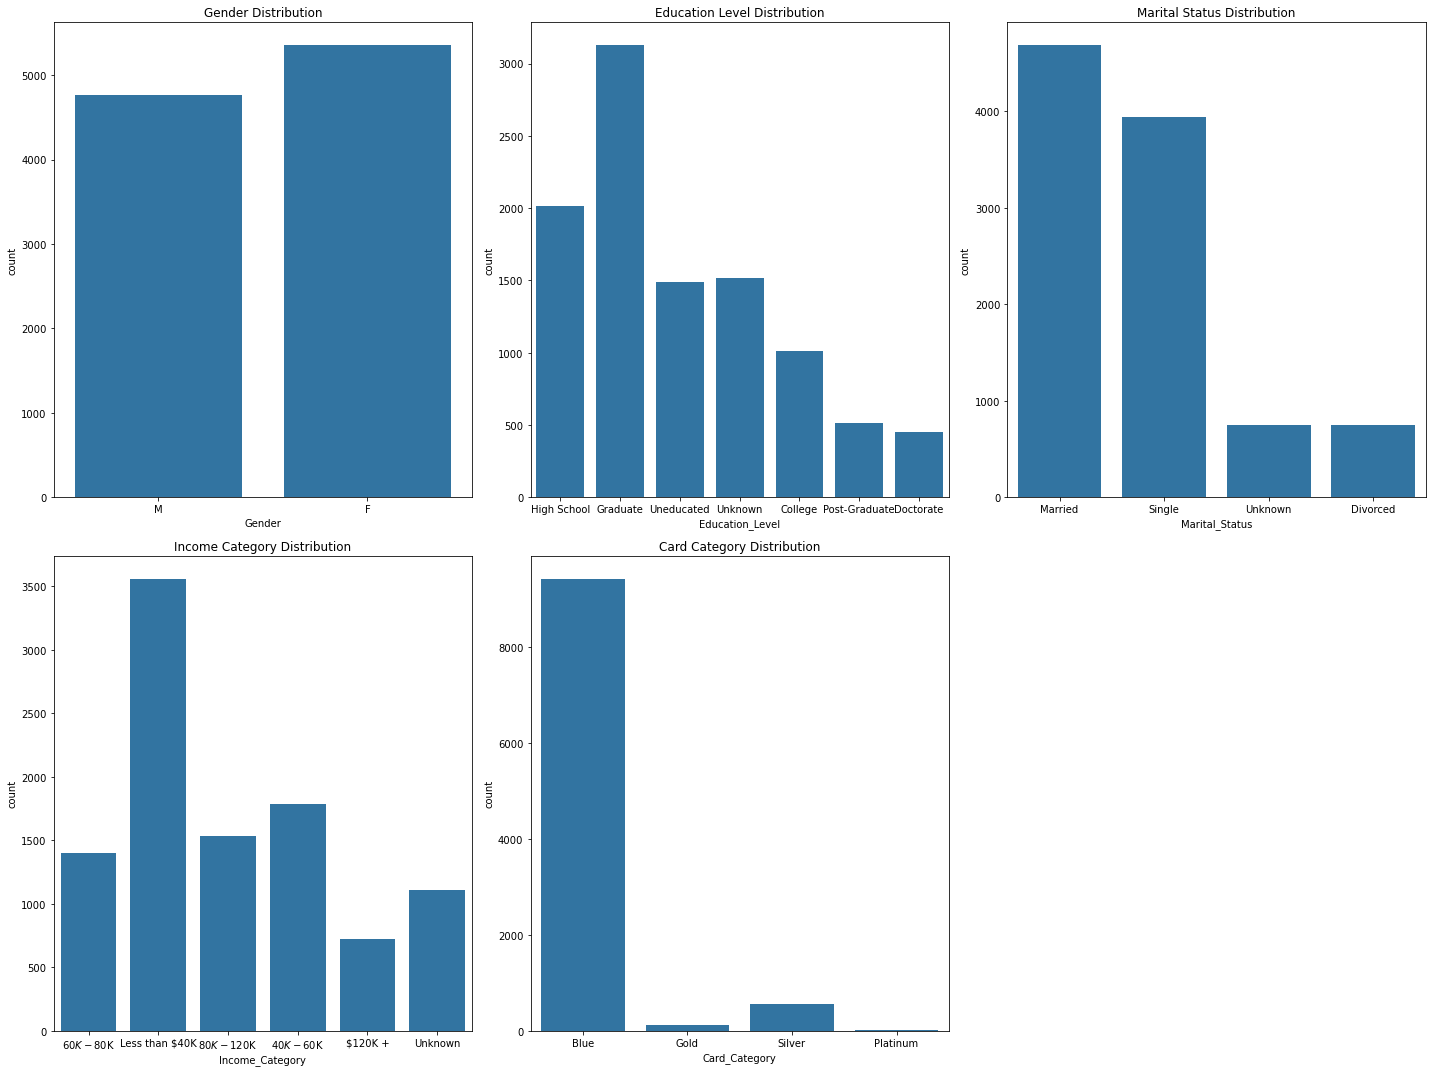

In [22]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Education_Level', data=df)
plt.title('Education Level Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Income_Category', data=df)
plt.title('Income Category Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Card_Category', data=df)
plt.title('Card Category Distribution')

plt.tight_layout()
plt.show()


### Kategorik Değişkenlerin Müşteri Kaybı Durumuna Göre Dağılımı

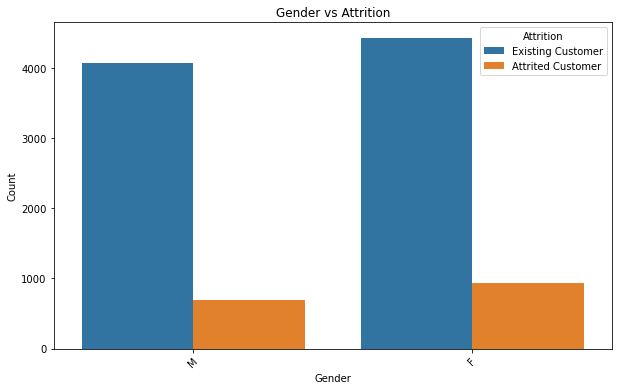

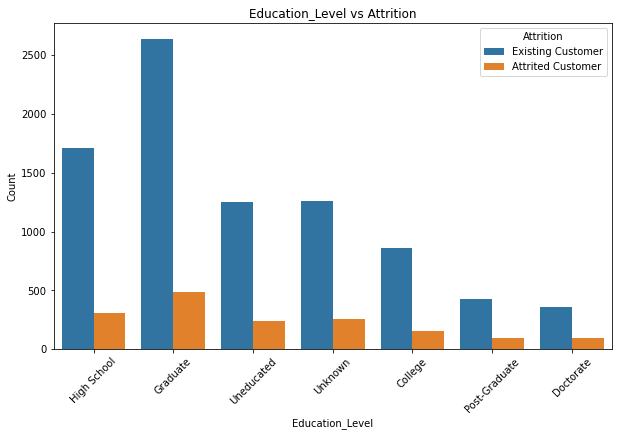

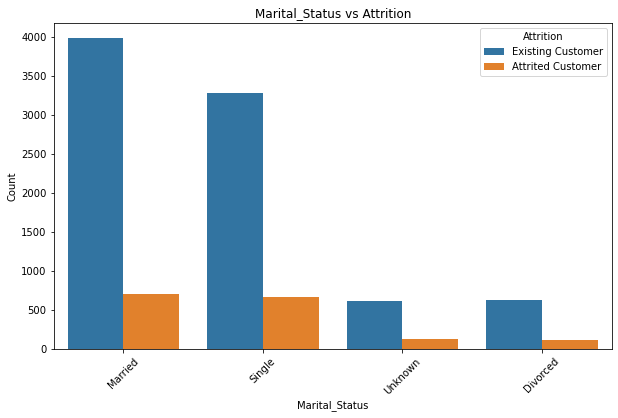

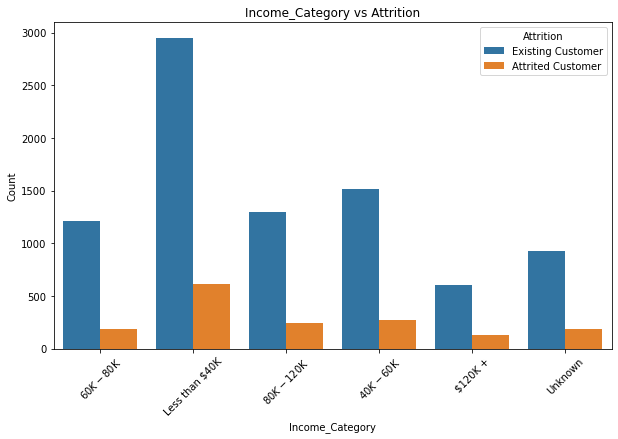

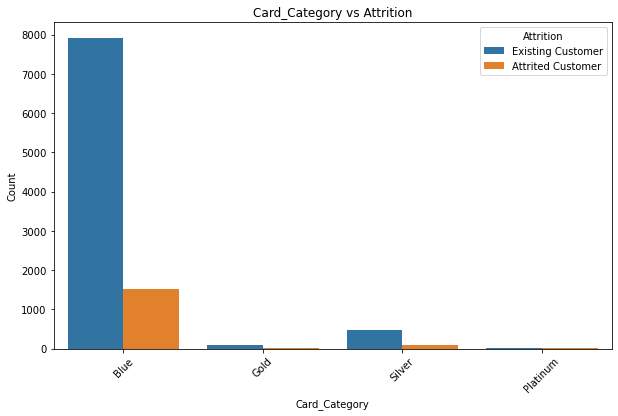

In [23]:
categorical_variables = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue="Attrition_Flag", data=df)
    plt.title(f"{variable} vs Attrition")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Attrition", loc="upper right")
    plt.show()


## Değişken İlişkilerini Keşfetme:  Korelasyon Matrisi Isı Haritası


Bu kod, veri setinizdeki sayısal değişkenler arasındaki korelasyonu hesaplayacak ve ardından bu korelasyonları ısı haritası olarak görselleştirecektir. annot=True parametresi, her hücredeki korelasyon değerlerini göstermek için kullanılır. cmap='coolwarm' parametresi, kullanılan renk haritasını belirler.



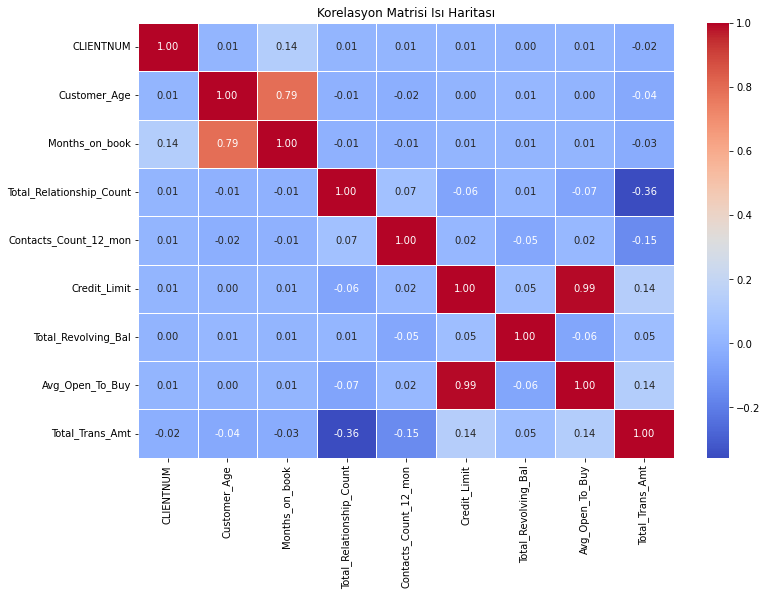

In [24]:
numeric_data = df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()


## Değişken İlişkilerini Keşfetme: Phik Korelasyon Isı Haritası

interval columns not set, guessing: ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']


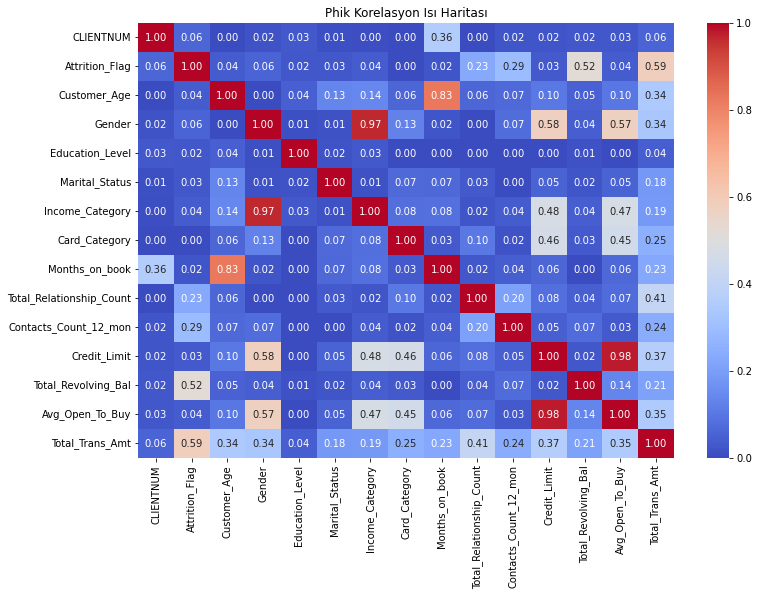

In [25]:
import phik

phik_matrix = df.phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phik Korelasyon Isı Haritası')
plt.show()


## Analysing Categorical Data

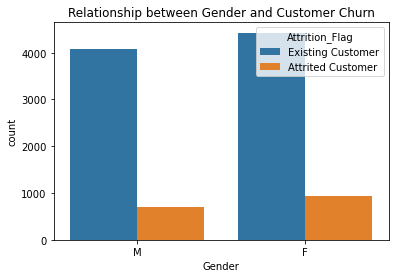

In [26]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Relationship between Gender and Customer Churn')
plt.show()


## Gelir Seviyesine Göre Kredi Limiti

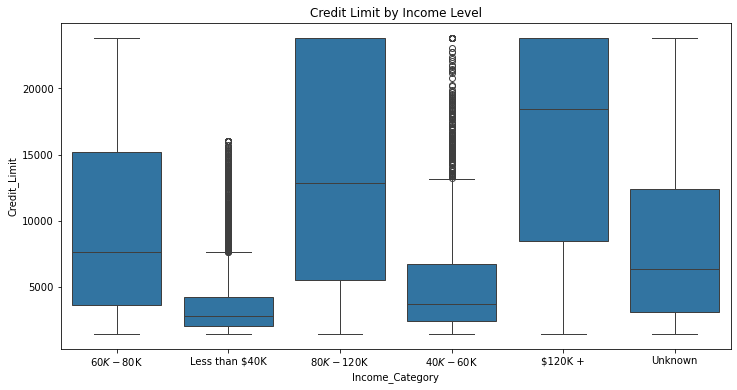

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df)
plt.title('Credit Limit by Income Level')
plt.show()


## Yaş ve Toplam Harcama Arasındaki İlişki

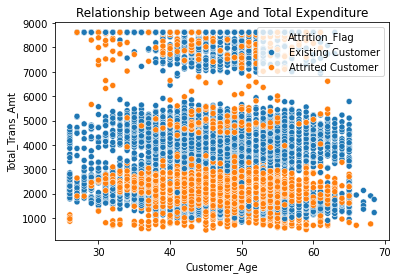

In [28]:
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=df)
plt.title('Relationship between Age and Total Expenditure')
plt.show()


## Müşteri Davranış Analizi

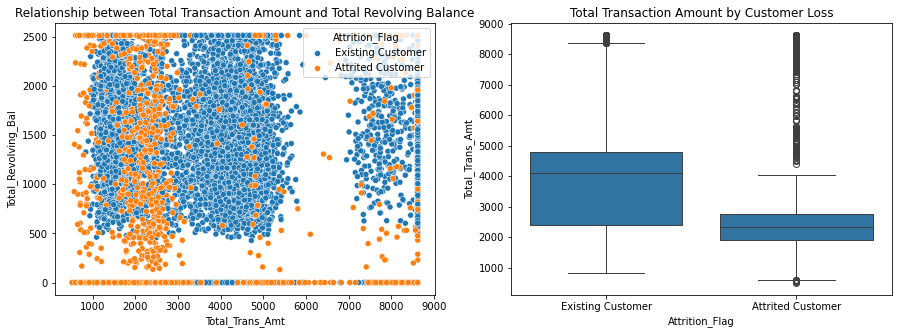

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Total_Trans_Amt', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)
plt.title('Relationship between Total Transaction Amount and Total Revolving Balance')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)
plt.title('Total Transaction Amount by Customer Loss')

plt.show()


## Gelir ve Kredi Limiti Arasındaki İlişki

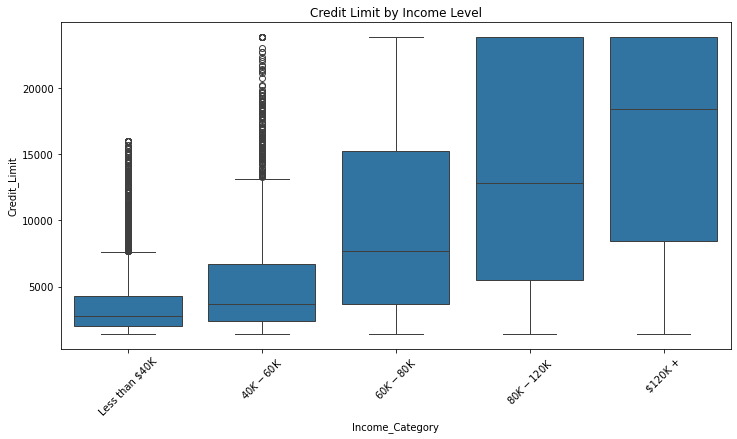

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df, order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])
plt.title('Credit Limit by Income Level')
plt.xticks(rotation=45)
plt.show()


## Veri Görselleştirme ve İnteraktif Grafikler

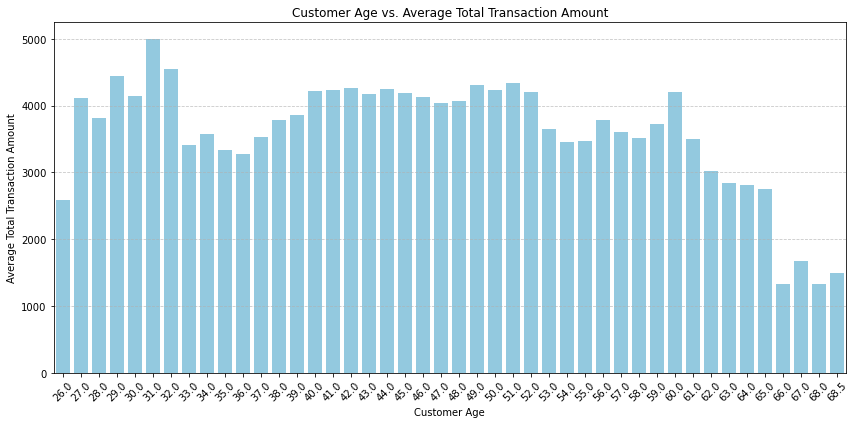

In [31]:
avg_total_trans_by_age = df.groupby('Customer_Age')['Total_Trans_Amt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Age', y='Total_Trans_Amt', data=avg_total_trans_by_age, color='skyblue')
plt.title('Customer Age vs. Average Total Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Average Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Müşteri Yaşlarına Göre Müşteri Kaybı Dağılımı

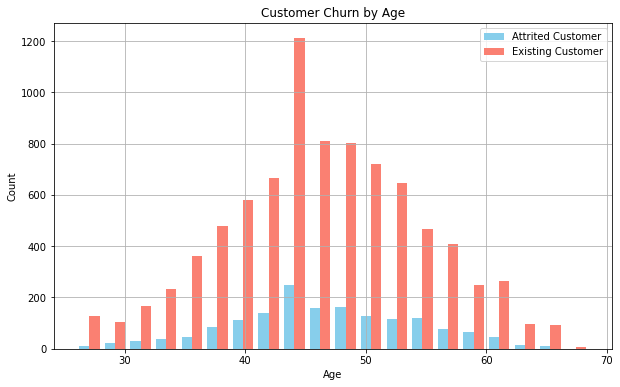

In [34]:
churned_customers_age = df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
existing_customers_age = df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age']

plt.figure(figsize=(10, 6))
plt.hist([churned_customers_age, existing_customers_age], bins=20, color=['skyblue', 'salmon'], label=['Attrited Customer', 'Existing Customer'])
plt.title('Customer Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


## İleri Analizler ve Modelleme

Bu süreç, bir Rastgele Orman sınıflandırıcısı kullanarak müşteri kaybını tahmin etmek için bir model oluşturur. Modelin performansını değerlendirmek için karışıklık matrisini ve sınıflandırma raporu sonuçlarını görüntüler.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veri Setini Hazırlama
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Kategorik Sütunların Tek Sıcak Kodlaması
X = pd.get_dummies(X, drop_first=True)

# Verileri Eğitim ve Test Kümelerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bir Rastgele Orman Sınıflandırıcı Modeli Oluşturma ve Eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Değerlendirmesi
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 194  133]
 [  28 1671]]
                   precision    recall  f1-score   support

Attrited Customer       0.87      0.59      0.71       327
Existing Customer       0.93      0.98      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.90      0.79      0.83      2026
     weighted avg       0.92      0.92      0.91      2026



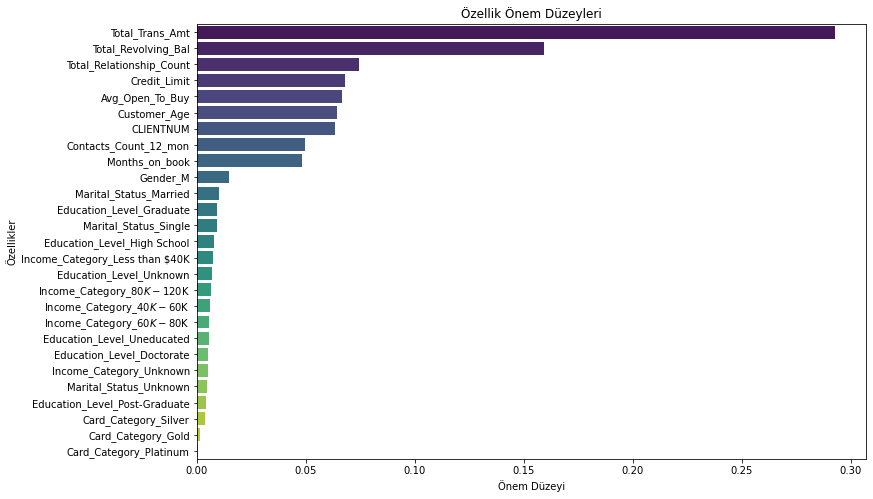

In [36]:
# Özellik Önem Düzeylerini Görselleştirme
feature_importances = rf_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Özellik Önem Düzeylerini Görselleştirme
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')
plt.show()

# Model Değerlendirme

Modelimizin performansını değerlendirmek için bu çıktıları yorumlayalım:

1. **Karmaşıklık Matrisi (Confusion Matrix):**
   - Karmaşıklık matrisi, modelinizin doğruluğunu değerlendirmenin bir yoludur. Matris, gerçek sınıfların (satırlar) ve tahmin edilen sınıfların (sütunlar) sayısını gösterir.
   - Sol üst köşedeki değerler, doğru şekilde tahmin edilen 'Attrited Customer' sınıfının sayısını (true negatives - TN) temsil eder.
   - Sağ üst köşedeki değerler, 'Attrited Customer' olarak yanlış şekilde tahmin edilen 'Existing Customer' sınıfının sayısını (false positives - FP) temsil eder.
   - Sol alt köşedeki değerler, 'Existing Customer' olarak yanlış şekilde tahmin edilen 'Attrited Customer' sınıfının sayısını (false negatives - FN) temsil eder.
   - Sağ alt köşedeki değerler, doğru şekilde tahmin edilen 'Existing Customer' sınıfının sayısını (true positives - TP) temsil eder.

2. **Sınıflandırma Raporu (Classification Report):**
   - Sınıflandırma raporu, modelinizin performansını daha ayrıntılı olarak değerlendirmenizi sağlar. Bu rapor, her sınıf için hassasiyet, geri çağırma ve F1-skoru gibi metrikleri sunar.
   - **Hassasiyet (Precision):** Bir sınıf olarak tahmin edilen örneklerin gerçekten o sınıfa ait olanların oranını gösterir. Yüksek hassasiyet, yanlış pozitif tahminlerin az olduğunu gösterir.
   - **Geri Çağırma (Recall):** Bir sınıfa ait olan tüm örneklerin doğru bir şekilde tahmin edilme oranını gösterir. Yüksek geri çağırma, yanlış negatif tahminlerin az olduğunu gösterir.
   - **F1-Skoru (F1-Score):** Hassasiyet ve geri çağırma arasındaki dengeyi sağlar. Düşük F1-skorları, modelin bir sınıfı doğru şekilde tahmin etme yeteneğinin zayıf olduğunu gösterebilir.
   - **Destek (Support):** Her sınıf için gerçek veri noktalarının sayısını temsil eder.

3. **Genel Yorum:**
   - Modelimiz, 'Existing Customer' sınıfını oldukça iyi tahmin ediyor (yüksek hassasiyet ve geri çağırma). Bu, mevcut müşterilerin neredeyse tümünü doğru şekilde tanımladığını gösterir.
   - Ancak, 'Attrited Customer' sınıfını tahmin etme konusunda daha az başarılıdır. Hassasiyet ve geri çağırma değerleri daha düşüktür, bu da bu sınıfı daha az doğru tahmin ettiğini gösterir.
   - Toplam olarak, modelimizin genel doğruluğu yüksektir (%92). Ancak, sınıf dengesizliği nedeniyle, modelin 'Attrited Customer' sınıfını daha iyi tanımlaması için iyileştirmeler yapabiliriz.

